# Capstone Project

Reuben Hough

In [1]:
# Importing Libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import pandas.util.testing as tm
from pandas import DataFrame
from pandas.plotting import register_matplotlib_converters
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import os
%matplotlib inline
import sys
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.preprocessing
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from numpy import random
import random
import datetime as dt
from datetime import timedelta
from dateutil.relativedelta import relativedelta
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX as SX
from statsmodels.tsa.seasonal import seasonal_decompose as decomp
from statsmodels.tsa.stattools import adfuller
import itertools
register_matplotlib_converters()
from time import time
import math
from fbprophet import Prophet
from collections import OrderedDict
from sklearn.pipeline import Pipeline

## Data Observation and Cleaning

In [2]:
# This function displays all columns when looking at the data
def display_all(df):
    with pd.option_context('display.max_rows', 1000):
        with pd.option_context('display.max_columns', 1000):
            display(df)

In [3]:
# Assigning all csv files to a variable
data = ["AllstarFull.csv","Appearances.csv","AwardsManagers.csv",
        "AwardsPlayers.csv","AwardsShareManagers.csv","AwardsSharePlayers.csv",
        "Batting.csv","BattingPost.csv","CollegePlaying.csv",
        "Fielding.csv","FieldingOF.csv","FieldingOFsplit.csv",
        "FieldingPost.csv","HallOfFame.csv","HomeGames.csv","Managers.csv",
        "ManagersHalf.csv","Parks.csv","People.csv","Pitching.csv",
        "PitchingPost.csv","Salaries.csv","Schools.csv","SeriesPost.csv",
        "Teams.csv","TeamsFranchises.csv","TeamsHalf.csv"]

In [4]:
# Creating a dictionary for filenames
dictum = {}
files = {}
for x in data:
    dictum[x] = pd.read_csv(x)
for x in dictum:
    # Removing all ".csv"
    cleaned = os.path.basename(x).replace('.csv', '')
    # Re-reading files after name change
    df = pd.read_csv(x)
    # Adding to "files" dictionary
    files[cleaned] = df

In [5]:
display_all(files['People'])

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,NaN,NaN,Don,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20085,zupofr01,1939.0,8.0,29.0,USA,CA,San Francisco,2005.0,3.0,25.0,USA,CA,Burlingame,Frank,Zupo,Frank Joseph,182.0,71.0,L,R,1957-07-01,1961-05-09,zupof101,zupofr01
20086,zuvelpa01,1958.0,10.0,31.0,USA,CA,San Mateo,NaN,NaN,NaN,NaN,NaN,NaN,Paul,Zuvella,Paul,173.0,72.0,R,R,1982-09-04,1991-05-02,zuvep001,zuvelpa01
20087,zuverge01,1924.0,8.0,20.0,USA,MI,Holland,2014.0,9.0,8.0,USA,AZ,Tempe,George,Zuverink,George,195.0,76.0,R,R,1951-04-21,1959-06-15,zuveg101,zuverge01
20088,zwilldu01,1888.0,11.0,2.0,USA,MO,St. Louis,1978.0,3.0,27.0,USA,CA,La Crescenta,Dutch,Zwilling,Edward Harrison,160.0,66.0,L,L,1910-08-14,1916-07-12,zwild101,zwilldu01


This dataset consists of over twenty thousand Major League Baseball players from 1871 to 2019.

This dataset is from Kaggle, however they did not provide complete and accurate information, so I searched for the source of the information which I then copied into this repository.

In [6]:
P = DataFrame(files['People'].copy())
P.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20090 entries, 0 to 20089
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   playerID      20090 non-null  object 
 1   birthYear     19976 non-null  float64
 2   birthMonth    19808 non-null  float64
 3   birthDay      19666 non-null  float64
 4   birthCountry  20029 non-null  object 
 5   birthState    19535 non-null  object 
 6   birthCity     19918 non-null  object 
 7   deathYear     9844 non-null   float64
 8   deathMonth    9843 non-null   float64
 9   deathDay      9842 non-null   float64
 10  deathCountry  9840 non-null   object 
 11  deathState    9790 non-null   object 
 12  deathCity     9834 non-null   object 
 13  nameFirst     20053 non-null  object 
 14  nameLast      20090 non-null  object 
 15  nameGiven     20053 non-null  object 
 16  weight        19273 non-null  float64
 17  height        19353 non-null  float64
 18  bats          18910 non-nu

For my purpose many of these categories will not be very useful, for example when and where some of these people died. There is also many missing values in those categories.

In [7]:
P.drop(['birthCountry','birthState','birthCity','deathYear',
        'deathMonth','deathDay','deathCountry','deathState',
        'deathCity','retroID','bbrefID','bats','throws',
        'nameGiven','nameLast','nameFirst'], axis=1, inplace=True)
People = P.copy()

In [8]:
People = People.loc[ : ,['playerID','birthYear','birthMonth','debut','finalGame']]

The next thing to do is to get more information from the data. First I'm going to calculate how old each player was when they started playing, how long they played, and how old they were at retirement.

In [9]:
# There are relatively few N/A values, they can be dropped for now
People = People.dropna()

In [10]:
# Here I'm separating the years and months and making them integer
# to make them easier to work with
People['debutYear'] = People['debut'].apply(lambda x: str(x)).apply(lambda x: '{}'.format(x[:4]))
People['debutYear'] = People['debutYear'].apply(lambda x: int(x))
People['debutMonth'] = People['debut'].apply(lambda x: str(x)).apply(lambda x: '{}'.format(x[-5:-3]))
People['debutMonth'] = People['debutMonth'].apply(lambda x: int(x))
People['finalYear'] = People['finalGame'].apply(lambda x: str(x)).apply(lambda x: '{}'.format(x[:4]))
People['finalYear'] = People['finalYear'].apply(lambda x: int(x))
People['finalMonth'] = People['finalGame'].apply(lambda x: str(x)).apply(lambda x: '{}'.format(x[-5:-3]))
People['finalMonth'] = People['finalMonth'].apply(lambda x: int(x))

In [11]:
# This function turns the year and month columns into one value
def Months(df, ycol, mcol):
    z = []
    for x in df.index:
        z.append(12*(df['{}'.format(ycol)][x]) + (df['{}'.format(mcol)][x]))
    return z

In [12]:
# This function subtracts the items of one list from another
def ToYears(list1, list2):
    z = []
    for x in list(range(len(list1))):
        z.append(round((list1[x] - list2[x])/12,2))
    return z

In [13]:
# Here I'm creating new data columns
start = Months(People, 'debutYear', 'debutMonth')
born = Months(People, 'birthYear', 'birthMonth')
final = Months(People, 'finalYear', 'finalMonth')
People['startingAge'] = ToYears(start,born)
People['timePlayed'] = ToYears(final,start)
People['endingAge'] = ToYears(final,born)

In [14]:
People = People.loc[ : ,['playerID','startingAge','timePlayed','endingAge']]

In [15]:
# Merging back to the original dataset, keeping N/A values for now
df = P.merge(People, how='left', on="playerID")
df.drop(['debut','finalGame','birthMonth','birthDay'], axis=1, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20090 entries, 0 to 20089
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   playerID     20090 non-null  object 
 1   birthYear    19976 non-null  float64
 2   weight       19273 non-null  float64
 3   height       19353 non-null  float64
 4   startingAge  19616 non-null  float64
 5   timePlayed   19616 non-null  float64
 6   endingAge    19616 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.2+ MB


## Player Awards

In [17]:
# Here I'm starting to look at more dataframes
AwardsPlayers = files['AwardsPlayers'].copy()
print(''.join((f"There have been {AwardsPlayers.shape[0]} awards ", 
f"given to {AwardsPlayers.nunique()[0]} players")))

There have been 6236 awards given to 1360 players


In [18]:
# That's less that 7 percent of the total,
# this should be useful in finding the best players
100*(AwardsPlayers.nunique()[0]/P.shape[0])

6.769537083125933

In [19]:
# This will let me make a simple plot and put in variables as needed
def toplot(dataframe, column, b, title="Title",xlabel="X Label Here",
            ylabel="Y Label Here", kind="line", color="skyblue"):
    mean = dataframe['{}'.format(column)].mean()
    median = dataframe['{}'.format(column)].median()
    ax = dataframe['{}'.format(column)].plot(kind=kind, bins=b, color=color)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.title(title)

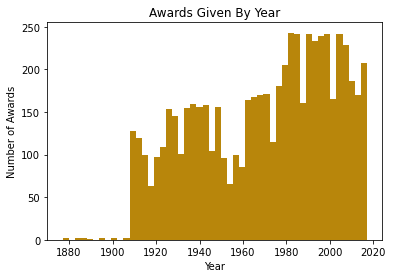

In [20]:
toplot(AwardsPlayers, 'yearID', 50, "Awards Given By Year",
        "Year", "Number of Awards", "hist", "darkgoldenrod")

Few awards were given out in the early years, presumably baseball was not as mainstream at the time. The MVP award began in 1910, the same time as the obvious increase.

There's also a clear dip in awards given shortly after WWII. I suspect this may be related to integration which was happening around that time, so this may be a sensitive issue to look into.

In [21]:
AwardsPlayers = AwardsPlayers.sort_values(by='playerID')

In [22]:
# Turning the players and awards into a dataframe
APNames = AwardsPlayers['playerID'].value_counts(dropna=False).index.tolist()
APAward = AwardsPlayers['playerID'].value_counts(dropna=False).tolist()
Awards = DataFrame([APNames,APAward]).transpose()
Awards.columns = ['playerID','awards']

Text(0, 0.5, 'Number of Awards')

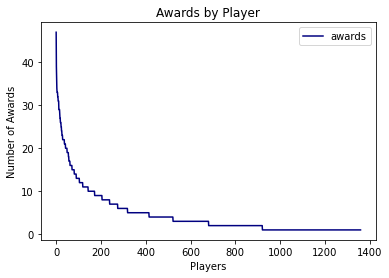

In [23]:
AwardPlot = Awards.plot(color="navy", title="Awards by Player")
AwardPlot.set_xlabel("Players")
AwardPlot.set_ylabel("Number of Awards")

It looks like only a few players are hogging most of the awards.

In [24]:
# Merging awards with main dataframe
df = df.merge(Awards, how='left', on="playerID")

In [25]:
# Replacing "NaN" awards with zero
df.awards.replace(np.NaN, 0, inplace=True)

## Batting Scores

In [26]:
# Reading data
B = DataFrame(files['Batting'].copy())
B1 = DataFrame(files['Batting'].copy())
# To avoid dividing by zero I'm going to eliminate every entry where a player didn't get a hit
NoHits = B1[B1['H'] == 0].index
B1.drop(NoHits, inplace = True)
# Copying dataframe into a smaller piece to make it easier and faster to work with
B1 = B1.loc[ : ,['playerID','AB', 'H']]

In [27]:
r1 = 100*(round((B1.shape[0])/(B.shape[0]), 3))
r2 = 100*(round((len(B1['playerID'].unique())/len(B['playerID'].unique())), 3))
print(f"""The percentage of entries there was a hit is {r1}%.
The percentage of all players who got at least one hit in their career is {r2}%""".format())

The percentage of entries there was a hit is 73.2%.
The percentage of all players who got at least one hit in their career is 75.8%


The batting average will be useful to find for player evaluation.

In [28]:
# Here is a function to return the batting average for each player
def BatAVG(df):
    df = df.sort_values(by='playerID', ascending=True)
    IDs = []
    AB = []
    Hits = []
    AVG = []
    for x in df['playerID'].unique():
        Player = df.loc[df['playerID'] == x]
        IDs.append(x)
        AB.append(sum(Player['AB']))
        Hits.append(sum(Player['H']))
        try:
        # Adding in an exception for dividing by zero just in case
            AVG.append(round((sum(Player['H']))/(sum(Player['AB'])), 3))
        except:
            AVG.append(0.000)
    data = {'playerID':IDs, 'battingAverage':AVG, 'totalAtBats':AB, 'totalHits':Hits}
    NewDF = pd.DataFrame(data)
    return NewDF

In [29]:
# This cell may take a minute or two to run
AVGDF = BatAVG(B1)

In [30]:
AVGDF.sort_values(by='battingAverage')

,playerID,battingAverage,totalAtBats,totalHits
7008,kellyme01,0.019,52,1
11945,sawyewi01,0.021,47,1
12294,sheltsk01,0.025,40,1
11074,raydocu01,0.026,38,1
1535,brizzto01,0.029,35,1
...,...,...,...,...
8303,manzajo01,1.000,1,1
11679,roweke01,1.000,1,1
11683,rowlami01,1.000,1,1
706,bassdo01,1.000,1,1


It's clear that players who only went to bat a few times will heavily skew the results. Batting a thousand isn't very prestegious if you've only gone to bat once. I think it's safe to get rid of the averages of anyone who has batted less than a hundred times in their career.

In [31]:
AVGDF2 = AVGDF.copy()
AVGDF2['battingAverage'] = AVGDF2['battingAverage'].where(AVGDF['totalAtBats'] >= 100, 0.000)
AVGDF2.sort_values(by='battingAverage', ascending=False)

,playerID,battingAverage,totalAtBats,totalHits
2500,cobbty01,0.366,11436,4189
642,barnero01,0.360,2391,860
6221,hornsro01,0.358,8173,2930
9064,meyerle01,0.356,1443,513
6504,jacksjo01,0.356,4981,1772
...,...,...,...,...
9159,millera01,0.000,73,14
9158,milleox01,0.000,25,7
4597,galvilo01,0.000,9,2
2393,clarkbi01,0.000,22,2


The top name is easily recognizable, Ty Cobb. That's a good sign I'm doing this correctly.

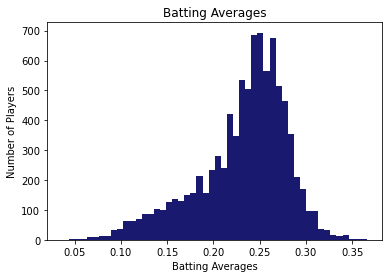

In [32]:
# Here I'll plot batting averages, leaving out the zeros that skew the data
BattingZero = AVGDF2[AVGDF2['battingAverage'] == 0].index
AVGDF2.drop(BattingZero, inplace = True)
toplot(AVGDF2, 'battingAverage', 50, "Batting Averages",
        "Batting Averages", "Number of Players", "hist", "midnightblue")

In [33]:
df = df.merge(AVGDF, how='left', on="playerID")
# Replacing "NaN" awards with zero
df.awards.replace(np.NaN, 0, inplace=True)

## Fielding Data

In [34]:
F = files['Fielding'].copy()
display_all(F.tail(10))

,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
143036,zeuchtj01,2019,1,TOR,AL,P,5,3.0,68.0,0,3,0.0,0,NaN,NaN,NaN,NaN,NaN
143037,zimmebr01,2019,1,CLE,AL,OF,5,2.0,66.0,5,0,0.0,0,NaN,NaN,NaN,NaN,NaN
143038,zimmejo02,2019,1,DET,AL,P,23,23.0,336.0,7,10,1.0,1,NaN,NaN,NaN,NaN,NaN
143039,zimmeky01,2019,1,KCA,AL,P,15,0.0,55.0,0,1,0.0,0,NaN,NaN,NaN,NaN,NaN
143040,zimmery01,2019,1,WAS,NL,1B,44,40.0,1038.0,307,20,3.0,24,NaN,NaN,NaN,NaN,NaN
143041,zobribe01,2019,1,CHN,NL,2B,32,23.0,558.0,36,54,3.0,16,NaN,NaN,NaN,NaN,NaN
143042,zobribe01,2019,1,CHN,NL,OF,17,14.0,341.0,22,2,0.0,0,NaN,NaN,NaN,NaN,NaN
143043,zobribe01,2019,1,CHN,NL,P,1,0.0,3.0,0,0,0.0,0,NaN,NaN,NaN,NaN,NaN
143044,zobribe01,2019,1,CHN,NL,SS,1,0.0,6.0,0,0,0.0,0,NaN,NaN,NaN,NaN,NaN
143045,zuninmi01,2019,1,TBA,AL,C,89,78.0,2069.0,764,37,6.0,7,4.0,NaN,27.0,17.0,NaN


There are several categories in this set that are unique to certain positions, particularly catchers. While it might be useful evaluating specific positions, generally speaking non-pitcher players can play all the fielding positions with roughly the same skill.

It will be useful to distinguish between pitchers and non-pitchers and evaluate them separately though.

In [35]:
F = F.loc[ : ,['playerID', 'PO', 'A', 'E', 'DP', 'InnOuts', 'G']]
F.rename(columns = {'PO':'putOuts','A':'assists','E':'errors',
                    'DP':'doublePlays', 'G':'Games'}, inplace = True)
F.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143046 entries, 0 to 143045
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   playerID     143046 non-null  object 
 1   putOuts      143046 non-null  int64  
 2   assists      143046 non-null  int64  
 3   errors       143045 non-null  float64
 4   doublePlays  143046 non-null  int64  
 5   InnOuts      113117 non-null  float64
 6   Games        143046 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 7.6+ MB


In [36]:
# There's only one missing errors value
F = F.dropna()

In [37]:
# Here is a function to unmelt the data
def Data(df, column):
    InterimDF = df.loc[ : ,['playerID',column]]
    IDs = []
    stats = []
    IDF = InterimDF['playerID'].sort_values()
    for x in IDF.unique():
        IDs.append(x)
        Player = InterimDF.loc[IDF == x]
        Stat = sum(Player[column])
        stats.append(Stat)
    data = {'playerID':IDs, 'stat':stats}
    NewDF = pd.DataFrame(data)
    return NewDF

In [38]:
# Again these may take quite a while.
FE = Data(F, 'putOuts')

In [39]:
FI = Data(F, 'assists')

In [40]:
FO = Data(F, 'errors')

In [41]:
FUM = Data(F, 'doublePlays')

In [42]:
English = Data(F, 'Games')

In [43]:
Man = [FE,FI,FO,FUM,English]

In [44]:
Giant = F.columns.tolist()[1:]

In [45]:
# Renaming columns
for x in list(range(len(Man))):
    Man[x].rename(columns = {'stat':Giant[x]}, inplace = True)

In [46]:
# Adding all the stats back into the main database
for x in Man:
    df = df.merge(x, how='left', on="playerID")

## Pitching Data

In [47]:
Pitching = files['Pitching'].copy()
display_all(Pitching.head(10))

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,0,0,78,43,23,0,11,1,NaN,7.96,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,0,0,792,361,132,4,37,13,NaN,4.50,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,0,0,3,8,3,0,0,0,NaN,27.00,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,1,0,639,295,103,3,31,15,NaN,4.35,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,0,0,27,20,10,0,3,0,NaN,10.00,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN
5,flowedi01,1871,1,TRO,NaN,0,0,1,0,0,0,0,3,1,0,0,0,0,NaN,0.00,NaN,0,NaN,0,3.0,1,0,NaN,NaN,NaN
6,mackde01,1871,1,RC1,NaN,0,1,3,1,1,0,0,39,20,5,0,3,1,NaN,3.46,NaN,1,NaN,0,70.0,1,30,NaN,NaN,NaN
7,mathebo01,1871,1,FW1,NaN,6,11,19,19,19,1,0,507,261,97,5,21,17,NaN,5.17,NaN,15,NaN,2,876.0,0,243,NaN,NaN,NaN
8,mcbridi01,1871,1,PH1,NaN,18,5,25,25,25,0,0,666,285,113,3,40,15,NaN,4.58,NaN,3,NaN,0,1059.0,0,223,NaN,NaN,NaN
9,mcmuljo01,1871,1,TRO,NaN,12,15,29,29,28,0,0,747,430,153,4,75,12,NaN,5.53,NaN,44,NaN,0,1334.0,0,362,NaN,NaN,NaN


In [48]:
Pitching = Pitching.loc[ : ,['playerID','W','G','SO','BFP','H','ERA','IPouts','ER']]

In [49]:
# These seem like a good number of categories to assess pitchers
Pitching.rename(columns = {'W':'wins','G':'games','SO':'strikeOuts','BFP':'battersFaced',
                           'H':'hits','IPouts':'inningsPitched','ER':'earnedRuns'}, inplace = True)
Pitching.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47628 entries, 0 to 47627
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   playerID        47628 non-null  object 
 1   wins            47628 non-null  int64  
 2   games           47628 non-null  int64  
 3   strikeOuts      47628 non-null  int64  
 4   battersFaced    47625 non-null  float64
 5   hits            47628 non-null  int64  
 6   ERA             47534 non-null  float64
 7   inningsPitched  47628 non-null  int64  
 8   earnedRuns      47628 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 3.3+ MB


Interestingly, ERA has a few N/A values, whereas earned runs and "IPouts", or innings pitched, does not. That means that instead of eliminating the N/A values I can simply calculate the ERA for each pitcher. This is good because it will be easier to do that for the player career anyway, and that's what I'm interested in.

In [50]:
Pitching.drop('ERA', axis=1, inplace=True)

The first thing I should do is unmelt the data to make it similar to the other data and merge.

In [51]:
# This may take a long time, again
Eeny = Data(Pitching, 'wins')

In [52]:
Meeny = Data(Pitching, 'games')

In [53]:
Miny = Data(Pitching, 'strikeOuts')

In [54]:
Moe = Data(Pitching, 'battersFaced')

In [55]:
Catch = Data(Pitching, 'hits')

In [56]:
Tiger = Data(Pitching, 'inningsPitched')

In [57]:
Toe = Data(Pitching, 'earnedRuns')

In [58]:
Holler = [Eeny, Meeny, Miny, Moe, Catch, Tiger, Toe]
LetGo = Pitching.columns.tolist()[1:]

In [59]:
# Renaming columns
for x in list(range(len(Holler))):
    Holler[x].rename(columns = {'stat':LetGo[x]}, inplace = True)

In [60]:
# Making new categories from the data with this function.
def Divide(df, col1, col2, precision=4):
    stat = []
    for x in df.index.to_list():
        A = float(df[col1][x])
        B = float(df[col2][x])
        try:
            stat.append(round((A/B), precision))
        except:
            stat.append(0.000)
    return stat

Here I'll make a histogram of players and their wins per game, ignoring those that played very few.

In [61]:
P2 = Pitching.copy()
P2['winsPerGame'] = Divide(P2, 'wins', 'games')
P2['strikeoutsPerBatter'] = Divide(P2, 'strikeOuts', 'battersFaced')
P2['hitsPerBatter'] = Divide(P2, 'hits', 'battersFaced')
P2['winsPerGame'] = P2['winsPerGame'].where(P2['games'] >= 40, 0.000)
P2['strikeoutsPerBatter'] = P2['strikeoutsPerBatter'].where(P2['games'] >= 40, 0.000)
P2['hitsPerBatter'] = P2['hitsPerBatter'].where(P2['games'] >= 40, 0.000)
PitchingZero = P2[P2['winsPerGame'] == 0.0000].index
P2.drop(PitchingZero, inplace = True)
100*(P2.shape[0]/Pitching.shape[0])

16.983707063072142

This only leaves us with around fifteen percent of all entries.

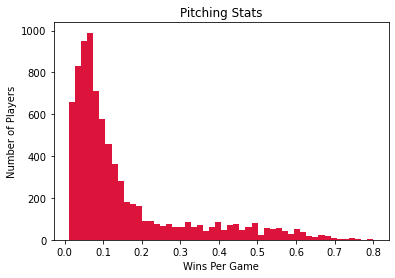

In [62]:
toplot(P2, 'winsPerGame', 50, "Pitching Stats",
        "Wins Per Game", "Number of Players", "hist", "crimson")

This is before unmelting the data, however, which means it's organized by year rather than player. If this significantly differs from the data where the players entire careers are evaluated then that would be interesting.

In [63]:
# Making a dataframe to merge others to
PitcherStats = DataFrame(Eeny['playerID'])
# Then merging the rest into it
for column in list(range(len(LetGo))):
    PitcherStats = PitcherStats.merge(Holler[column], how='left', on="playerID")

In [64]:
# Here I'm merging the main stats for pitchers only
PitcherStats = PitcherStats.merge(df, how='left', on="playerID")

In [65]:
P3 = PitcherStats.copy()
P3['winsPerGame'] = Divide(P3, 'wins', 'games')
P3['strikeoutsPerBatter'] = Divide(P3, 'strikeOuts', 'battersFaced')
P3['hitsPerBatter'] = Divide(P3, 'hits', 'battersFaced')
P3['winsPerGame'] = P3['winsPerGame'].where(P3['games'] >= 40, 0.000)
P3['strikeoutsPerBatter'] = P3['strikeoutsPerBatter'].where(P3['games'] >= 40, 0.000)
P3['hitsPerBatter'] = P3['hitsPerBatter'].where(P3['games'] >= 40, 0.000)
PitchZero = P3[P3['winsPerGame'] == 0.0000].index
P3.drop(PitchZero, inplace = True)
100*(P3.shape[0]/PitcherStats.shape[0])

49.080751650584055

It jumps to almost half when talking about all players, but that still means half of MLB players in history haven't played more than 40 games!

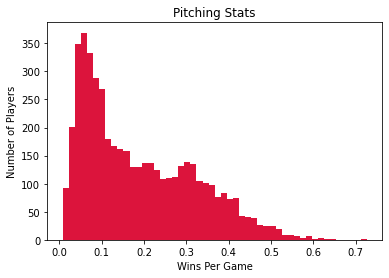

In [66]:
toplot(P3, 'winsPerGame', 50, "Pitching Stats",
        "Wins Per Game", "Number of Players", "hist", "crimson")

This looks like a more reasonable distribution.

## Finishing the Data Cleaning

In [67]:
# Here I'm getting the fielders by subtracting the pitchers
FielderStats = df.copy()
Plist = PitcherStats.playerID.to_list()
FielderStats = FielderStats[~FielderStats.playerID.isin(Plist)]

In [68]:
# If players have too many N/A values they will skew the data
# However, as can be seen, sometimes they are only missing one or two
NoHeightList = FielderStats.copy()
NoHeightList = NoHeightList[NoHeightList.height >= 0]
NoHeightList = NoHeightList.playerID.to_list()
NoHeightList = FielderStats[~FielderStats.playerID.isin(NoHeightList)]
NoHeightList.sort_values(by="timePlayed", na_position='first')

,playerID,birthYear,weight,height,startingAge,timePlayed,endingAge,awards,battingAverage,totalAtBats,totalHits,putOuts,assists,errors,doublePlays,InnOuts
135,ahearch01,1858.0,NaN,NaN,NaN,NaN,NaN,0,0.250,4.0,1.0,2.0,5.0,2.0,0.0,1.0
490,armoubi99,1869.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
556,atkined01,1851.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,2.0
760,banckst01,1853.0,NaN,NaN,NaN,NaN,NaN,0,0.153,72.0,11.0,47.0,31.0,23.0,2.0,23.0
762,bancrfr99,1846.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6407,geninfr01,1866.0,NaN,NaN,25.50,9.00,34.50,0,0.226,514.0,116.0,279.0,215.0,64.0,22.0,147.0
7451,harbibi01,1855.0,162.0,NaN,20.17,9.42,29.58,0,0.247,1510.0,373.0,1155.0,316.0,267.0,23.0,401.0
924,barrysh01,1878.0,NaN,NaN,20.58,9.42,30.00,0,0.267,4014.0,1073.0,4099.0,565.0,189.0,191.0,1076.0
5483,farrojo01,1853.0,NaN,NaN,19.42,11.17,30.58,0,0.197,228.0,45.0,190.0,102.0,79.0,7.0,62.0


In [69]:
# This creates a new column counting how many NaN values
# each row has
FielderStats['Value Counts'] = FielderStats.count(axis='columns')
FielderStats['Value Counts'].value_counts()

16    6393
11    2386
8      585
13     292
14     191
3       99
5       91
15      66
10      66
7       43
12      21
6        7
9        4
2        1
Name: Value Counts, dtype: int64

Some of them have their player ID and the fact that they didn't receive an award. Not the most useful.

Getting rid of those that have ten or less values doesn't eliminate too many in the Fielder stats.

In [70]:
# Here's a function that removes problem values
def CleanData(df,col,t=0.0001,T=99999):
    AList = df[df[col] <= t]
    BList = df[df[col] >= T]
    AList = AList.playerID.to_list()
    BList = BList.playerID.to_list()
    CList = AList + BList
    df = df[~df.playerID.isin(CList)]
#    df.dropna(subset=[col], inplace=True)
    return df

In [71]:
FielderStats = CleanData(FielderStats,'Value Counts', 10)

Unfortunately there are many players who didn't have fielding stats. I don't think it's possible to make a good model without them. I'm going to make the attempt anyway and see how it turns out, but for my main model I'll drop them.

In [72]:
NoField = FielderStats.copy()
FielderStats.dropna(subset=['putOuts'], inplace=True)
NoField.drop(['putOuts', 'assists', 'errors', 'doublePlays', 'InnOuts'], axis=1, inplace=True)

In [73]:
# There are very few NA values without the fielding data
NoField = NoField.dropna()

In [74]:
# This function fills NaN values with a random integer in an interval
def Replace(df,column,low,high,interval=5.0, dtype=float):
    numbers = np.arange(low, high, interval, dtype=dtype)
    array = np.random.choice(numbers, size=df.shape[0])
    df[column]=df[column].mask(pd.isnull, array)

In [75]:
# This replaces the few NA values with a random number
# according to the stats with the most
Replace(FielderStats,"weight",170.0,190.0)
Replace(FielderStats,"height",68,75,1)
FielderStats = CleanData(FielderStats,'timePlayed', 0.08)
FielderStats.dropna(subset=['birthYear'], inplace=True)

After that there are very few NA values left that I need to worry about.

In [76]:
FielderStats = FielderStats.dropna()

Innings pitched is actually calculated here outs, so in order to get ERA which is calculated per nine innings, or 27 outs, I'll just divide by 27.

In [77]:
PitcherStats = CleanData(PitcherStats,'inningsPitched', 50)
PitcherStats = CleanData(PitcherStats,'timePlayed', 0.08)
PitcherStats['inningsPitched'] /= 27
PitcherStats['ERA'] = Divide(PitcherStats, 'earnedRuns', 'inningsPitched', precision=3)

In [78]:
# This simplifies by turning whether the pitcher has also batted into a binary
# then drops the other columns
PitcherStats['battingAverage'] = PitcherStats['battingAverage'].where(PitcherStats['battingAverage'] >= -1, 1)
PitcherStats['battingAverage'] = PitcherStats['battingAverage'].where(PitcherStats['battingAverage'] == 1, 0)
PitcherStats.rename(columns = {'battingAverage':'hasntBatted'}, inplace = True)

In [79]:
# Like the ERA I think these could also be useful stats
PitcherStats['stikeOutAVG'] = Divide(PitcherStats, 'strikeOuts', 'inningsPitched', 3)
PitcherStats['errorAVG'] = Divide(PitcherStats, 'errors', 'inningsPitched', 3)
PitcherStats['assistAVG'] = Divide(PitcherStats, 'assists', 'inningsPitched', 3)
PitcherStats['DoublePlayAVG'] = Divide(PitcherStats, 'doublePlays', 'inningsPitched', 3)
PitcherStats['BattersAVG'] = Divide(PitcherStats, 'battersFaced', 'inningsPitched', 3)
PitcherStats['WinsAVG'] = Divide(PitcherStats, 'wins', 'inningsPitched', 3)

In [80]:
# Here I'm getting a list of columns to drop
drop = PitcherStats.columns.tolist()
todrop = [drop[1:8]]
todrop.append(drop[12:14])
todrop.append(drop[16:21])
# this makes it one list instead of a list of lists
todrop = [item for elem in todrop for item in elem]

In [81]:
# And finally dropping all extraneous columns
PitcherStats.drop(todrop, axis=1, inplace=True)
PitcherStats = PitcherStats.dropna()

In [82]:
# Adding a couple more useful categories. Unfortunately I don't have 
# The number of innings played for Fielders, just the amount of time in years
FielderStats = FielderStats.sort_values(by='playerID')
FielderStats['AVGAtBats'] = Divide(FielderStats, 'totalAtBats', 'timePlayed', 2)
FielderStats['AVGHits'] = Divide(FielderStats, 'totalAtBats', 'timePlayed', 2)
FielderStats['errorAVG'] = Divide(FielderStats, 'errors', 'timePlayed', 3)
FielderStats['assistAVG'] = Divide(FielderStats, 'assists', 'timePlayed', 3)
FielderStats['DoublePlayAVG'] = Divide(FielderStats, 'doublePlays', 'timePlayed', 3)

In [85]:
drop = FielderStats.columns.tolist()
FielderStats.drop(drop[9], axis=1, inplace=True)
FielderStats.drop(drop[14:16], axis=1, inplace=True)

In [86]:
# There are still several thousand of each
print(FielderStats.shape[0])
print(PitcherStats.shape[0])

5926
5646


In [87]:
# Exporting to csv to use a new Notebook
FielderStats.to_csv('FielderStats.csv', index=False)
PitcherStats.to_csv('PitcherStats.csv', index=False)
NoField.to_csv('NoField.csv', index=False)